In [47]:
# 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as spst
import urllib.request 
import json 
# import datetime
# 한글폰트 지정(맑은고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 고해상도
%config InlineBackend.figure_format = 'retina'


In [56]:
from datetime import datetime 

In [4]:
path = 'https://raw.githubusercontent.com/matplotlib/sample_data/master/aapl.csv'
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
1,2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2,2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
3,2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
4,2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [5]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6081 entries, 0 to 6080
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6081 non-null   datetime64[ns]
 1   Open       6081 non-null   float64       
 2   High       6081 non-null   float64       
 3   Low        6081 non-null   float64       
 4   Close      6081 non-null   float64       
 5   Volume     6081 non-null   int64         
 6   Adj Close  6081 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 332.7 KB


In [7]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79


In [8]:
df['month'] = df.index.month
df.head()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08,10
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26,10
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80,10
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74,10
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79,10


In [9]:
df.groupby('month').agg(sum)

,Open,High,Low,Close,Volume,Adj Close
month,,,,,,
1,23948.52,24461.73,23390.56,23918.13,9805804200,11367.98
2,21974.53,22371.15,21557.04,21963.23,6522864800,9997.85
3,24723.68,25219.91,24282.92,24753.57,7070702800,11474.91
4,23914.40,24380.59,23432.92,23918.97,7117967600,11584.53
5,25550.13,25957.23,25094.68,25525.41,6234889200,12807.17
6,24295.34,24690.45,23825.69,24247.35,6450082800,12597.24
7,22989.93,23408.38,22533.05,22975.71,6763186500,12633.79
8,24714.18,25159.17,24315.65,24756.72,6235410200,13574.59
9,23367.95,23793.52,22888.32,23316.07,6605294800,12419.90


In [10]:
df.groupby([df.index.year,df.index.month]).sum()

Open     High      Low    Close     Volume  Adj Close  month
Date Date                                                                 
1984 9      431.70   437.33   425.70   427.82   76916800      48.83    144
     10     575.82   582.21   569.95   570.56  127866400      65.10    230
     11     515.45   520.44   507.95   508.96  120740800      58.06    231
     12     541.20   547.57   536.82   538.95  123907200      61.50    240
1985 1      649.44   656.83   641.08   643.57  227784000      73.43     22
...            ...      ...      ...      ...        ...        ...    ...
2008 6     3757.50  3812.54  3683.70  3748.20  695468400    3748.20    126
     7     3691.39  3758.63  3610.58  3690.47  705348600    3690.47    154
     8     3583.03  3639.27  3543.65  3592.46  467263100    3592.46    168
     9     3005.72  3070.83  2888.22  2966.11  859181100    2966.11    189
     10    1002.14  1046.99   939.97   983.26  669676100     983.26    100

[290 rows x 7 columns]

In [11]:
df.groupby(df.index.month).sum()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
1,23948.52,24461.73,23390.56,23918.13,9805804200,11367.98,501
2,21974.53,22371.15,21557.04,21963.23,6522864800,9997.85,920
3,24723.68,25219.91,24282.92,24753.57,7070702800,11474.91,1569
4,23914.40,24380.59,23432.92,23918.97,7117967600,11584.53,1984
5,25550.13,25957.23,25094.68,25525.41,6234889200,12807.17,2545
6,24295.34,24690.45,23825.69,24247.35,6450082800,12597.24,3072
7,22989.93,23408.38,22533.05,22975.71,6763186500,12633.79,3556
8,24714.18,25159.17,24315.65,24756.72,6235410200,13574.59,4248
9,23367.95,23793.52,22888.32,23316.07,6605294800,12419.90,4518


In [21]:
df.resample(rule ='AS').mean().head()

,Open,High,Low,Close,Volume,Adj Close,month
Date,,,,,,,
1984-01-01,25.802125,26.094375,25.505250,25.578625,5.617890e+06,2.918625,10.562500
1985-01-01,20.377431,20.593281,20.127510,20.193676,6.444914e+06,2.304150,6.517787
1986-01-01,32.387984,32.939684,31.854664,32.461028,7.546125e+06,3.703913,6.533597
1987-01-01,53.822846,55.036798,52.695178,53.889684,8.442070e+06,8.906087,6.545455
1988-01-01,41.556047,42.186759,40.890751,41.540079,5.835341e+06,9.564704,6.529644


In [22]:
def first_day(sample):
    return sample(0)

In [ ]:
df.resample('A').apply(first_day)

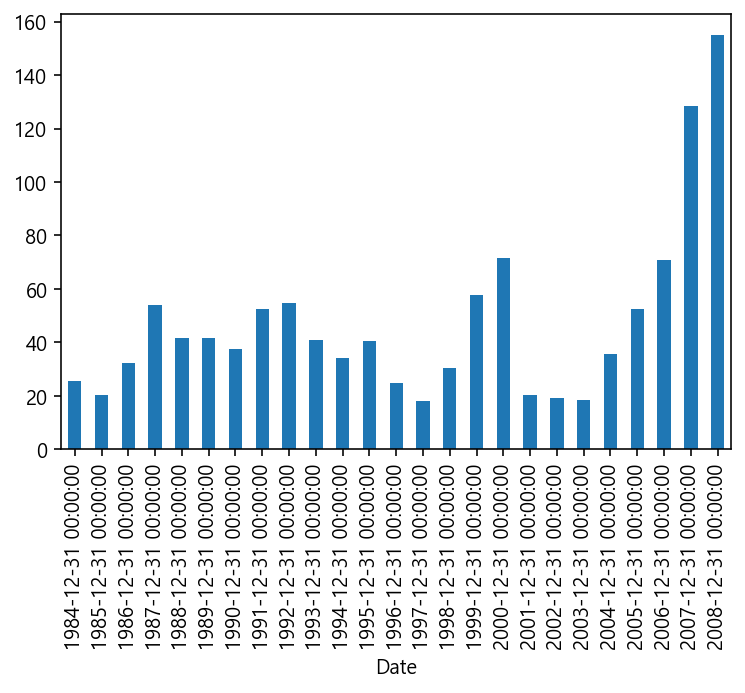

In [33]:
df['Close'].resample('A').mean().plot(kind = 'bar')
plt.show()

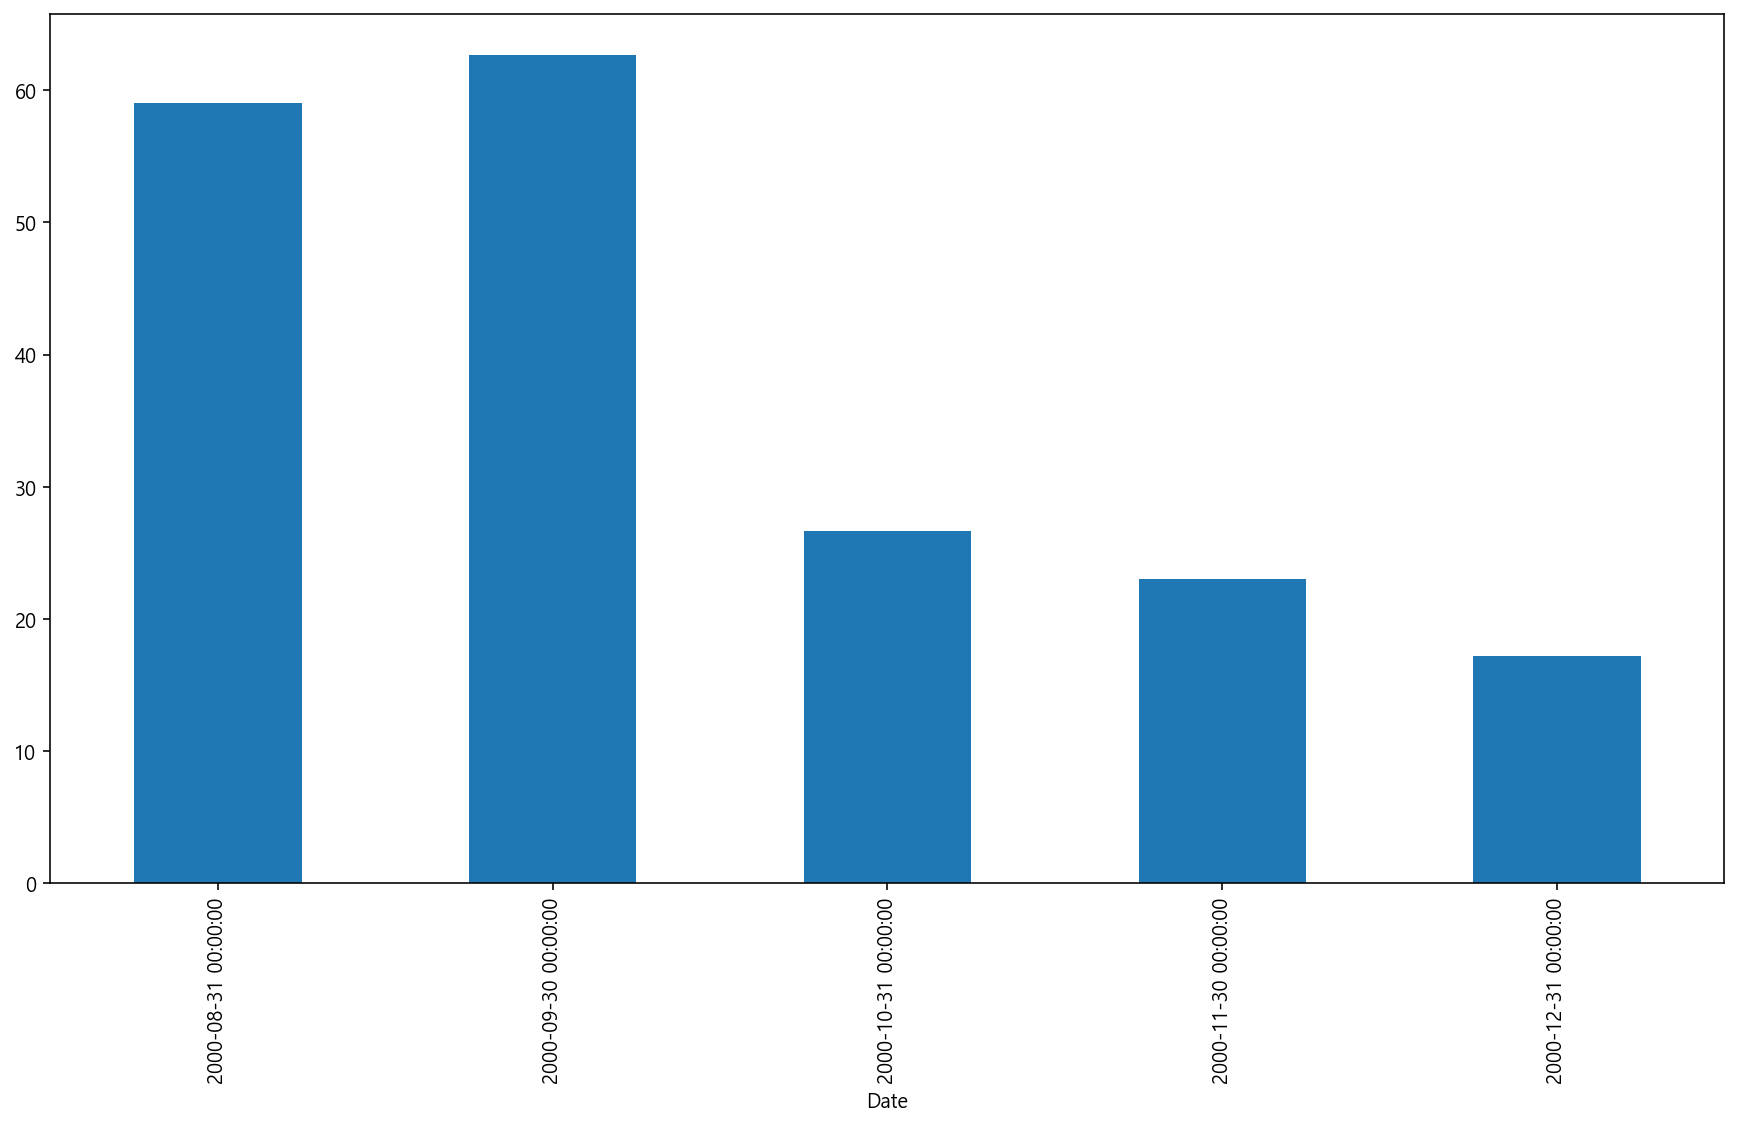

In [44]:
# 2000년 8월 이후 'Open' 열 데이터를 Monthly 리셈플링 후 맥스값 으로 plot 바차트로 
df['Open']['2000-8':'2000-12'].resample('M').max().plot(kind = 'bar', figsize = (15,8))
plt.show()

In [57]:
daily_daterange = \
pd.date_range(start = datetime(1995,1,1),
              end = datetime(2000,1,1),
              freq = 'B')

In [58]:
daily_dataset = \
pd.DataFrame(
    data = {'value' : np.random.rand(len(daily_daterange))},
    index = daily_daterange)

In [59]:
daily_dataset.head()

,value
1995-01-02,0.657288
1995-01-03,0.362075
1995-01-04,0.564083
1995-01-05,0.657697
1995-01-06,0.082023
